## About the data 

### This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### Content

#### The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

#### Acknowledgements

Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

###### The question we want to answer from this data set is that can we build a machine learnning model that can help us to predict whether a women can have a diabetes according to certain variables


In [51]:
### load all the necassary packeges for the analysis 

# Standard operational package imports.
import pandas as pd
import numpy as np
import statsmodels.api as sm
# Important imports for preprocessing, modeling, and evaluation.
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import sklearn.metrics as metrics 
# Visualization package imports.
import matplotlib.pyplot as plt
import seaborn as sns 

In [11]:
# load the data set 
diabetes = pd.read_csv(r"C:\Users\adnan\Downloads\diabetes\diabetes.csv")
diabetes.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
281,10,129,76,28,122,35.9,0.280,39,0
337,5,115,76,0,0,31.2,0.343,44,1
562,1,87,68,34,77,37.6,0.401,24,0
16,0,118,84,47,230,45.8,0.551,31,1
129,0,105,84,0,0,27.9,0.741,62,1


In [12]:
print(diabetes.shape)
print(diabetes.info())

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [13]:
### Searching for Null  values and duplicates 
diabetes.isnull().sum().sum()

0

In [14]:
### Checking for the missing values per columns 
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [15]:
# counts the number of valuese either 1 for diabetes or 0 for not 
diabetes['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

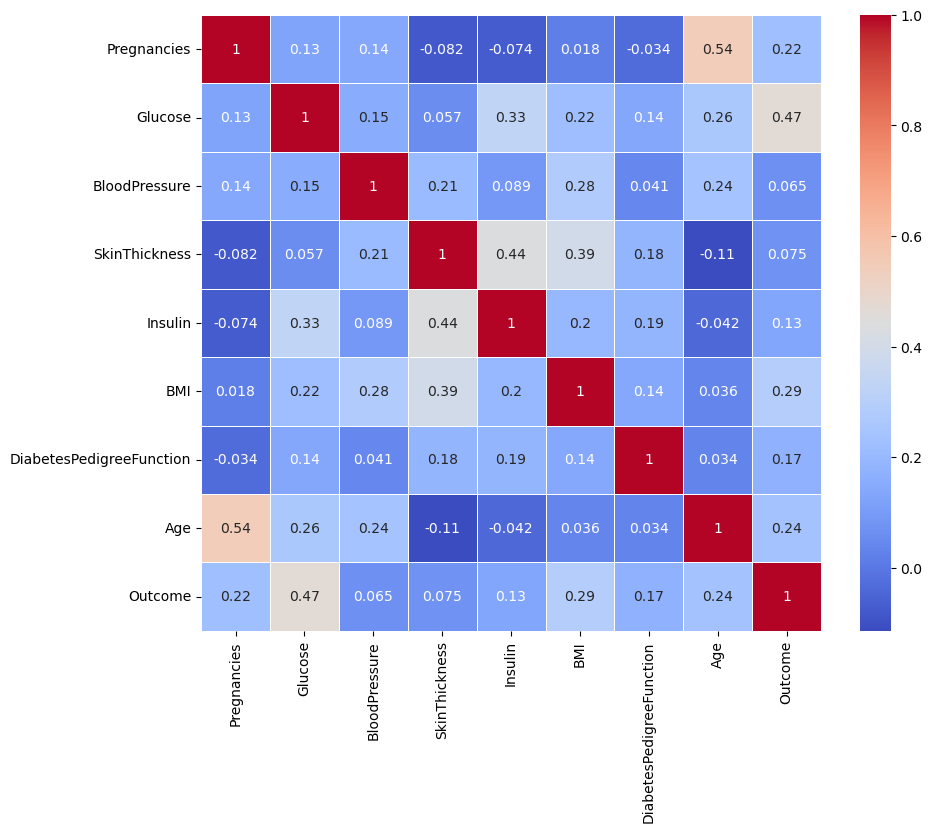

In [16]:
# creating a heat map to detrmine which variable to include in the model and which to exclude 
plt.figure(figsize=(10,8))
sns.heatmap(diabetes.corr(),annot=True ,cmap='coolwarm',linewidths=0.5)
plt.show()

In [20]:
### using  traning logistic model method in order to choese which variable will fit the model very well
x= diabetes.drop('Outcome',axis=1)
y=diabetes['Outcome']
# divided the data into train set and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
# train the model 
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(x_train , y_train)
#using statsmodel to obtain the stayistical significant 
x_train_sm = sm.add_constant(x_train)
log_reg_sm = sm.Logit(y_train , x_train_sm).fit()
print(log_reg_sm.summary())

Optimization terminated successfully.
         Current function value: 0.459388
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  537
Model:                          Logit   Df Residuals:                      528
Method:                           MLE   Df Model:                            8
Date:                Wed, 19 Feb 2025   Pseudo R-squ.:                  0.2905
Time:                        13:27:30   Log-Likelihood:                -246.69
converged:                       True   LL-Null:                       -347.71
Covariance Type:            nonrobust   LLR p-value:                 2.378e-39
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -9.4451      0.915    -10.321      0.000     -11.239

#### As we can see we will just take the variabels with the positive coeffient and have a p_value less 5%  and these are Galucose , BIM and Age the rest of the variables will be neglected 

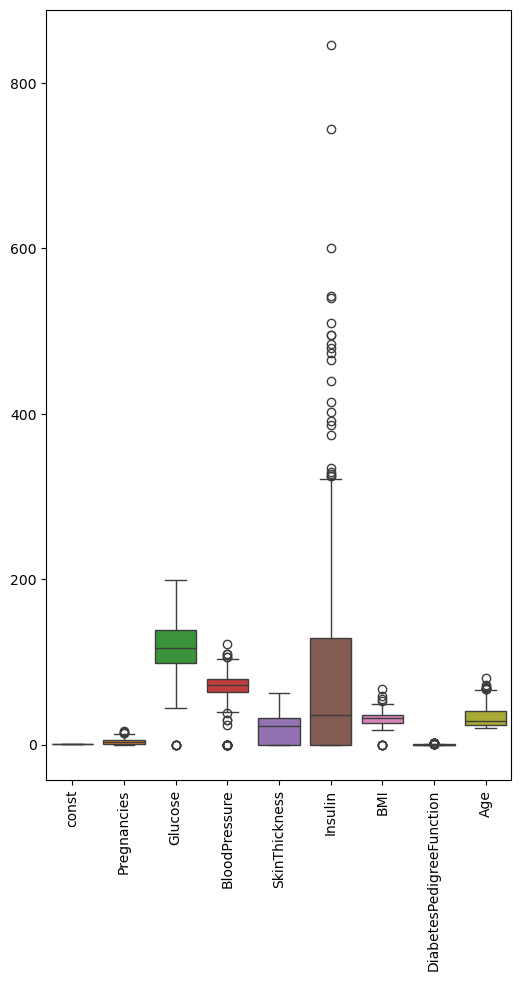

In [23]:
# no we need to test the model for the outliers 
plt.figure(figsize=(6,10))
sns.boxplot(data=x_train_sm)
plt.xticks(rotation=90)
plt.show()

##### It is clear that targted variables have no outliers 


In [30]:
# retest the model
selected_variables =['Glucose','BMI','Age']
x_new= diabetes[selected_variables]
y= diabetes['Outcome']
# divded the data into train and test data 
x_train_new,x_test_new,y_train,y_test=train_test_split(x_new,y,test_size=0.3,random_state=42)


In [32]:
# Add constant to the model 
x_train_new_sm=sm.add_constant(x_train_new)
x_test_new_sm = sm.add_constant (x_test_new )

In [34]:
# train the model 
log_reg_new = sm.Logit(y_train,x_train_new_sm).fit()

Optimization terminated successfully.
         Current function value: 0.465949
         Iterations 6


###### Make pridections 

In [47]:
y_pred_new = log_reg_new.predict(x_test_new_sm)
y_pred_new_class = (y_pred_new >0.5).astype(int)
# evaluate the model 
accuracy_new = accuracy_score(y_test,y_pred_new_class)
report_new= classification_report(y_test,y_pred_new_class)
print(f'Accuracy:{accuracy_new}')
print(report_new)

Accuracy:0.7272727272727273
              precision    recall  f1-score   support

           0       0.79      0.80      0.79       151
           1       0.61      0.59      0.60        80

    accuracy                           0.73       231
   macro avg       0.70      0.69      0.70       231
weighted avg       0.72      0.73      0.73       231



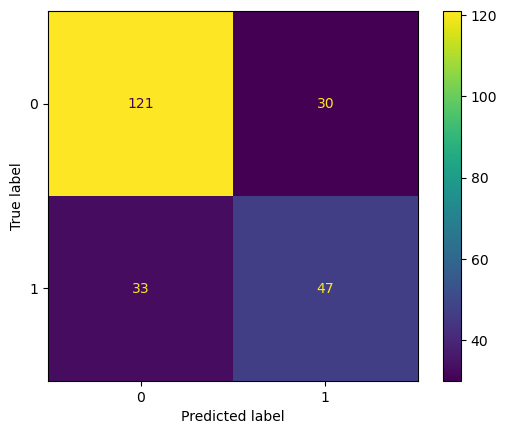

In [53]:
# using the confusion matrix to evaluate the model 
cm = confusion_matrix(y_test,y_pred_new_class)
cm_display =ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()

In [63]:
print({len(x_train_new)})
print({len(x_test_new)})

{537}
{231}
